In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd

**Importing the dataset**

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
del data['User ID']

In [ ]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [ ]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
x=data[['Age','Gender','EstimatedSalary']].values
y=data['Purchased'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
x_train

array([[-0.80330081,  1.        , -1.19121795],
       [ 0.75697997,  1.        , -1.36859801],
       [ 0.85449752, -1.        ,  1.43991958],
       [-0.51074816, -1.        , -1.48685138],
       [-1.48592365, -1.        ,  0.37563923],
       [-1.19337101, -1.        ,  0.55301929],
       [ 1.04953262, -1.        , -1.04340124],
       [-0.21819552, -1.        , -0.30431766],
       [ 0.95201507, -1.        , -1.33903467],
       [-1.09585346, -1.        , -1.07296458],
       [-0.51074816,  1.        ,  1.97205975],
       [ 2.21974321, -1.        , -1.0138379 ],
       [ 1.43960282,  1.        , -1.39816136],
       [ 0.07435713,  1.        , -0.39300769],
       [-1.19337101, -1.        ,  0.64170932],
       [ 2.02470811,  1.        , -0.89558452],
       [ 1.14705017, -1.        ,  0.58258263],
       [-0.02316042,  1.        ,  0.2869492 ],
       [-0.21819552,  1.        ,  0.25738586],
       [-0.31571307,  1.        , -0.74776781],
       [-1.68095875, -1.        , -0.570

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train,y_train)
  trainaccuracy=accuracy_score(y_train,dt.predict(x_train))
  val_score=cross_val_score(dt,x_train,y_train,cv=10)
  print(f"Depth is : {depth}, Training accuracy is: {trainaccuracy}, cross-val score is :{np.mean(val_score)}")


Depth is : 1, Training accuracy is: 0.84375, cross-val score is :0.840625
Depth is : 2, Training accuracy is: 0.93125, cross-val score is :0.91875
Depth is : 3, Training accuracy is: 0.93125, cross-val score is :0.9125
Depth is : 4, Training accuracy is: 0.95625, cross-val score is :0.909375
Depth is : 5, Training accuracy is: 0.965625, cross-val score is :0.9
Depth is : 6, Training accuracy is: 0.971875, cross-val score is :0.9
Depth is : 7, Training accuracy is: 0.978125, cross-val score is :0.8875
Depth is : 8, Training accuracy is: 0.98125, cross-val score is :0.89375
Depth is : 9, Training accuracy is: 0.9875, cross-val score is :0.8875
Depth is : 10, Training accuracy is: 0.990625, cross-val score is :0.896875


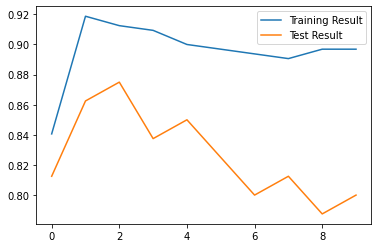

In [ ]:
import matplotlib.pyplot as plt
train=[]
test=[]
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train,y_train)
  trestaccuracy=accuracy_score(y_test,dt.predict(x_test))
  test.append(trestaccuracy)
  val_score=cross_val_score(dt,x_train,y_train,cv=10)
  train.append(np.mean(val_score))
plt.plot(train,label='Training Result')
plt.plot(test,label='Test Result')
plt.legend()
plt.show()

**Predicting the Test set results**

In [ ]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
y_pred



array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[39,  9],
       [ 2, 30]])

**Visualising the Training set results**

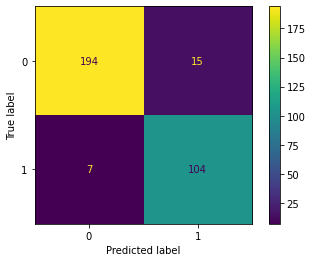

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,x_train,y_train)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


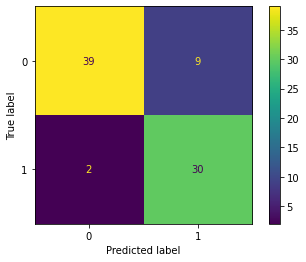

In [ ]:
plot_confusion_matrix(dt,x_test,y_test)